In [215]:
import pandas as pd

In [216]:
df=pd.read_csv('/content/Iris.csv')

In [217]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [218]:
df.shape

(150, 6)

In [219]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [220]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [221]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [222]:
X=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [223]:
from sklearn.cluster import KMeans
k_rng= range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(X)
  sse.append(km.inertia_)


In [224]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 49.95165000000001,
 44.88072106782108,
 37.25518205128206,
 32.66900094510966,
 28.26246794871796]

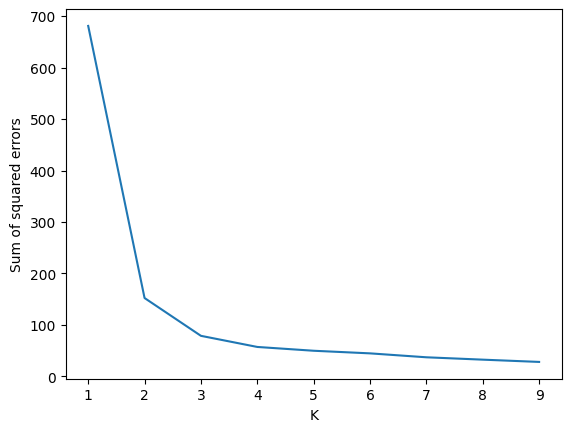

In [225]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng,sse)

In [226]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcad = pca.fit_transform(X)


In [227]:
df['PCA1'] = pcad[:, 0]
df['PCA2'] = pcad[:, 1]

In [228]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PCA1,PCA2
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


In [229]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [230]:
from sklearn.cluster import KMeans

In [231]:
kmeans = KMeans(n_clusters=3)

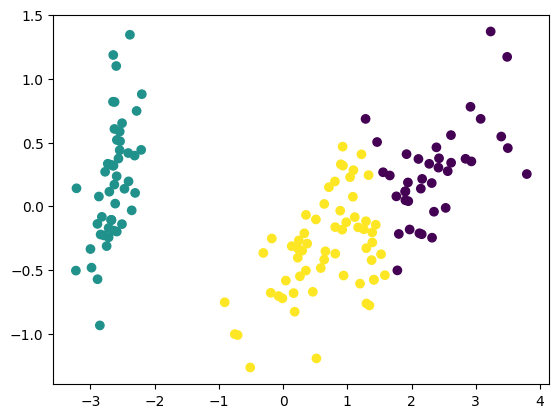

In [233]:
cluster_labels = kmeans.fit_predict(pcad)
plt.scatter(df['PCA1'], df['PCA2'], c=cluster_labels)
plt.show()

In [234]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [241]:
linked = linkage(X)

Text(0.5, 1.0, 'Dendrogram')

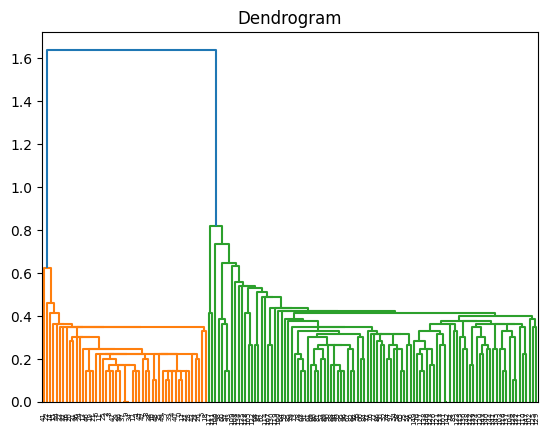

In [242]:
dendrogram(linked)
plt.title("Dendrogram")